# Data Visualization with Python Final Assignment

In [1]:
import pandas as pd
import numpy as np

# Q1

In [2]:
df = pd.read_csv('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/coursera/Topic_Survey_Assignment.csv',
                index_col=0)
df

,Very interested,Somewhat interested,Not interested
Big Data (Spark / Hadoop),1332,729,127
Data Analysis / Statistics,1688,444,60
Data Journalism,429,1081,610
Data Visualization,1340,734,102
Deep Learning,1263,770,136
Machine Learning,1629,477,74


In [3]:
df.sort_values(['Very interested'], ascending=False, inplace=True)
df_sorted_values = np.round((df/2233)*100,2)
df_sorted_values

,Very interested,Somewhat interested,Not interested
Data Analysis / Statistics,75.59,19.88,2.69
Machine Learning,72.95,21.36,3.31
Data Visualization,60.01,32.87,4.57
Big Data (Spark / Hadoop),59.65,32.65,5.69
Deep Learning,56.56,34.48,6.09
Data Journalism,19.21,48.41,27.32


# Q2

In [4]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use('ggplot')

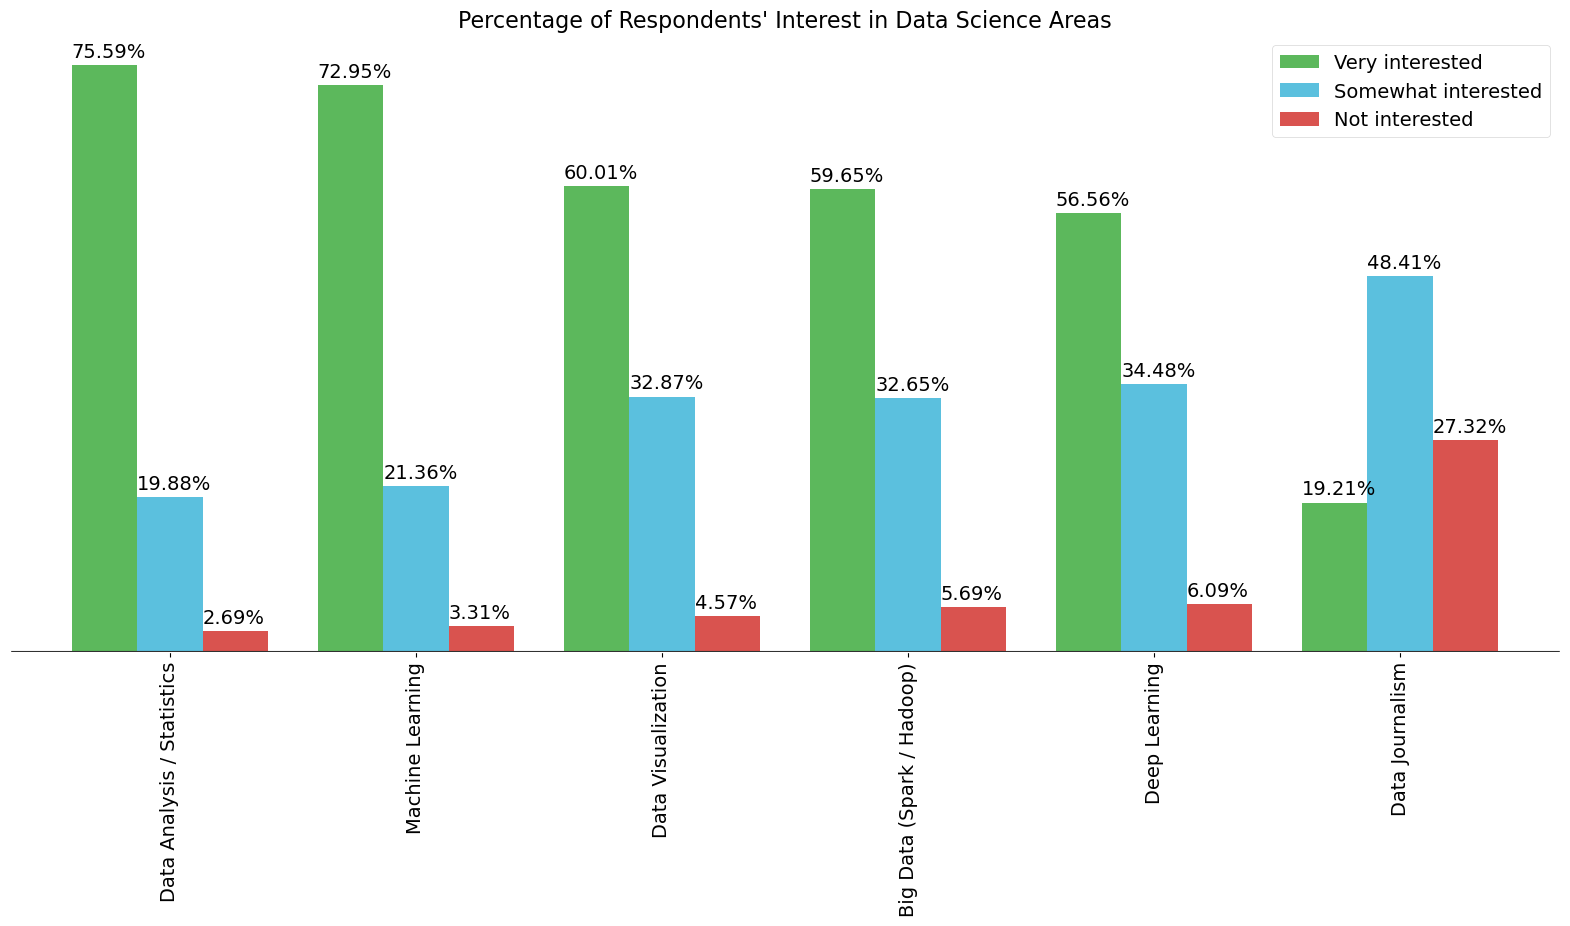

In [5]:
ax = df_sorted_values.plot(kind='bar',
            figsize=(20,8),
            width=0.8,
            color=['#5cb85c','#5bc0de','#d9534f'])

#plot values
ax.set_facecolor('white') # background color = white
ax.tick_params(axis='x', colors='black', labelsize=14) # display x axis with size and color
ax.axhline(0, color='black') # draw the x axis line
ax.legend(fontsize=14, facecolor='white') # display legend background color = white and fontsize
ax.set_title("Percentage of Respondents' Interest in Data Science Areas", fontsize = 16)
ax.tick_params(top=False, left=False, right=False, labelleft=False) # remove top,left,right and left label


for p in ax.patches:   #display the percentages above the bars
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{}%'.format(height), (x, y + height + 1),fontsize=14)

In [6]:
crime_df=pd.read_csv('https://cocl.us/sanfran_crime_dataset')
crime_df.head(5)

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212120
1,120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212168
2,141059263,WARRANTS,WARRANT ARREST,Monday,04/25/2016 12:00:00 AM,14:59,BAYVIEW,"ARREST, BOOKED",KEITH ST / SHAFTER AV,-122.388856,37.729981,"(37.7299809672996, -122.388856204292)",14105926363010
3,160013662,NON-CRIMINAL,LOST PROPERTY,Tuesday,01/05/2016 12:00:00 AM,23:50,TENDERLOIN,NONE,JONES ST / OFARRELL ST,-122.412971,37.785788,"(37.7857883766888, -122.412970537591)",16001366271000
4,160002740,NON-CRIMINAL,LOST PROPERTY,Friday,01/01/2016 12:00:00 AM,00:30,MISSION,NONE,16TH ST / MISSION ST,-122.419672,37.765050,"(37.7650501214668, -122.419671780296)",16000274071000


# Q3

In [7]:
crime_df.rename(columns={'PdDistrict':'Neighborhood'}, inplace=True)
crime_data = crime_df.groupby(['Neighborhood']).size().reset_index(name='Count')
crime_data

,Neighborhood,Count
0,BAYVIEW,14303
1,CENTRAL,17666
2,INGLESIDE,11594
3,MISSION,19503
4,NORTHERN,20100
5,PARK,8699
6,RICHMOND,8922
7,SOUTHERN,28445
8,TARAVAL,11325
9,TENDERLOIN,9942


In [8]:
# install folium
!pip install folium

import folium
print('Installed Folium')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.3/102.3 kB 18.6 MB/s eta 0:00:00
Installed Folium


# Q4

In [9]:
# download the map of sanfranciso
!wget https://cocl.us/sanfran_geojson -O sanfran_geo.json

--2023-03-02 18:09:13--  https://cocl.us/sanfran_geojson
Resolving cocl.us (cocl.us)... 184.28.29.185, 184.28.29.208, 2600:1404:dc00::6858:cc60, ...
Connecting to cocl.us (cocl.us)|184.28.29.185|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://ibm.box.com/shared/static/9luw8hp6klzopv2p9zg11uy2y0fmzrr5.geojson [following]
--2023-03-02 18:09:14--  https://ibm.box.com/shared/static/9luw8hp6klzopv2p9zg11uy2y0fmzrr5.geojson
Resolving ibm.box.com (ibm.box.com)... 74.112.186.144
Connecting to ibm.box.com (ibm.box.com)|74.112.186.144|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /public/static/9luw8hp6klzopv2p9zg11uy2y0fmzrr5.geojson [following]
--2023-03-02 18:09:14--  https://ibm.box.com/public/static/9luw8hp6klzopv2p9zg11uy2y0fmzrr5.geojson
Reusing existing connection to ibm.box.com:443.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://ibm.ent.box.com/public/static/9

In [10]:
# Ready the map
lat = 37.7749
long = -122.4194

sanfran_map= folium.Map(location=[lat,long], zoom_start=12)
sanfran_map